In [1]:
from tensorflow import keras
from tensorflow.keras import datasets, layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), _ = datasets.mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32")  / 255

In [4]:
model = keras.Sequential([
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
101/375 [=======>......................] - ETA: 0s - loss: 1.1906 - accuracy: 0.7129 

2025-06-03 23:51:34.853058: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2025-06-03 23:51:34.853262: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 0s 773us/step - loss: 0.6727 - accuracy: 0.8330 - val_loss: 0.3595 - val_accuracy: 0.9018
Epoch 2/20
375/375 [==============================] - 0s 536us/step - loss: 0.3511 - accuracy: 0.9028 - val_loss: 0.3118 - val_accuracy: 0.9112
Epoch 3/20
375/375 [==============================] - 0s 542us/step - loss: 0.3157 - accuracy: 0.9126 - val_loss: 0.2895 - val_accuracy: 0.9203
Epoch 4/20
375/375 [==============================] - 0s 535us/step - loss: 0.2994 - accuracy: 0.9162 - val_loss: 0.2810 - val_accuracy: 0.9235
Epoch 5/20
375/375 [==============================] - 0s 658us/step - loss: 0.2896 - accuracy: 0.9190 - val_loss: 0.2759 - val_accuracy: 0.9225
Epoch 6/20
375/375 [==============================] - 0s 564us/step - loss: 0.2829 - accuracy: 0.9209 - val_loss: 0.2716 - val_accuracy: 0.9245
Epoch 7/20
375/375 [==============================] - 0s 557us/step - loss: 0.2783 - accuracy: 0.9225 - val_loss: 0.2699 - val_accuracy: 0.9268
Epo

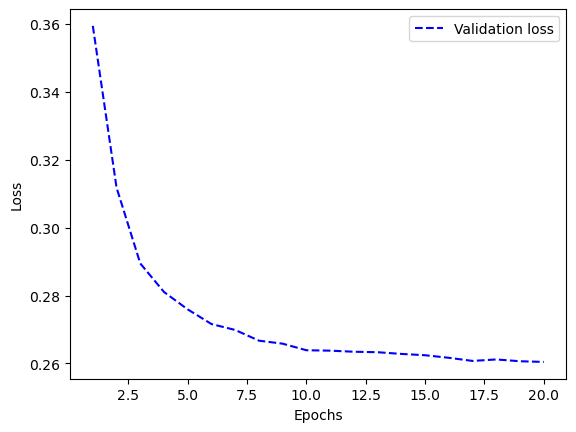

In [5]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [6]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3616 - accuracy: 0.8977 - val_loss: 0.1984 - val_accuracy: 0.9417
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1603 - accuracy: 0.9531 - val_loss: 0.1326 - val_accuracy: 0.9603
Epoch 3/20
375/375 [==============================] - 1s 1ms/step - loss: 0.1119 - accuracy: 0.9665 - val_loss: 0.1141 - val_accuracy: 0.9660
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.9740 - val_loss: 0.1018 - val_accuracy: 0.9697
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9793 - val_loss: 0.1126 - val_accuracy: 0.9662
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9824 - val_loss: 0.0953 - val_accuracy: 0.9737
Epoch 7/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0964 - val_accuracy: 0.9735
Epoch 

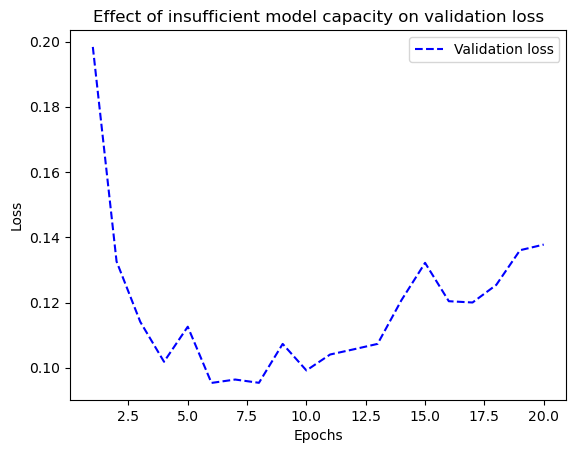

In [7]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()